# Introduction #

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. The system is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Ford GoBike is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

## Data Wrangling ##

### Gathering Data ###

In [1]:
# import all packages and set plots to be embedded inline
from requests import get
from os import makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

%matplotlib inline

In [2]:
#make a directory to store datasets
dir_csvs = 'data_files'
makedirs(dir_csvs)

In [3]:
#store 2017 dataset in csv
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(dir_csvs))

# download the datasets with pandas and store it in directory created above
for month in range(1,13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)  
    print('2018 -',month)
    
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(dir_csvs)
    
for month in range(1,4):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2019' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url) 
    print('2019 -',month)
    
    # code below opens zip file; BytesIO returns a readable and writeable view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # puts extracted zip file into folder trip_data_files
    unzipped_file.extractall(dir_csvs)

2018 - 1
2018 - 2
2018 - 3
2018 - 4
2018 - 5
2018 - 6
2018 - 7
2018 - 8
2018 - 9
2018 - 10
2018 - 11
2018 - 12
2019 - 1
2019 - 2
2019 - 3


In [4]:
# Combine All Locally Saved CSVs into One DataFrame 
csvs = []
for file_name in listdir(dir_csvs):
    csvs.append(pd.read_csv(dir_csvs+'/'+file_name))
df = pd.concat(csvs)
df.to_csv('data.csv', index=False)

In [5]:
# run if files are already downloaded
df = pd.read_csv('data.csv')

### Assessing Data ###

In [6]:
# Visually check first 5 records
df.head()

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,0.0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,1.0,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,2.0,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,3.0,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,4.0,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [7]:
# Visually check 20 random records
df.sample(20)

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1816918,NaN,144,No,209,242.0,37.860125,-122.269384,Milvia St at Derby St,2018-09-17 18:15:23.5730,1976.0,Female,246.0,37.869060,-122.270556,Berkeley Civic Center,2018-09-17 18:11:54.5730,Subscriber
674808,NaN,2932,No,780,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-02-12 15:09:28.2470,1969.0,Male,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2018-02-12 14:56:28.0850,Subscriber
832251,NaN,1679,No,680,58.0,37.776619,-122.417385,Market St at 10th St,2018-03-01 09:03:24.6290,1988.0,Female,52.0,37.777416,-122.441838,McAllister St at Baker St,2018-03-01 08:52:03.8010,Subscriber
2611230,NaN,6371,Yes,559,341.0,37.336188,-121.889277,Fountain Alley at S 2nd St,2019-02-23 17:58:26.0340,1993.0,Male,296.0,37.325998,-121.877120,5th St at Virginia St,2019-02-23 17:49:06.2210,Subscriber
2172455,NaN,861,No,968,136.0,37.754436,-122.404364,23rd St at San Bruno Ave,2018-11-14 20:15:25.0640,1996.0,Male,81.0,37.775880,-122.393170,Berry St at 4th St,2018-11-14 19:59:16.7710,Subscriber
2708422,NaN,5351,No,4076,42.0,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2019-02-08 21:22:46.9350,1995.0,Male,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2019-02-08 20:14:50.7690,Subscriber
2972074,NaN,5998,Yes,461,280.0,37.337122,-121.883215,San Fernando St at 7th St,2019-03-07 11:08:43.5050,1993.0,Male,296.0,37.325998,-121.877120,5th St at Virginia St,2019-03-07 11:01:02.1890,Subscriber
816844,NaN,1508,No,118,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-03-06 13:59:35.5940,1997.0,Male,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2018-03-06 13:57:36.9410,Subscriber
1021611,NaN,796,No,195,127.0,37.756708,-122.421025,Valencia St at 21st St,2018-05-21 20:15:56.0690,1985.0,Male,132.0,37.751819,-122.426614,24th St at Chattanooga St,2018-05-21 20:12:40.5640,Subscriber
694088,NaN,3562,No,513,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2018-02-07 16:41:35.4950,1984.0,Male,49.0,37.780760,-122.394989,S Park St at 3rd St,2018-02-07 16:33:01.6410,Subscriber


In [8]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 17 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    3015214 non-null int64
bike_share_for_all_trip    2495514 non-null object
duration_sec               3015214 non-null int64
end_station_id             3002777 non-null float64
end_station_latitude       3015214 non-null float64
end_station_longitude      3015214 non-null float64
end_station_name           3002777 non-null object
end_time                   3015214 non-null object
member_birth_year          2808247 non-null float64
member_gender              2808680 non-null object
start_station_id           3002777 non-null float64
start_station_latitude     3015214 non-null float64
start_station_longitude    3015214 non-null float64
start_station_name         3002777 non-null object
start_time                 3015214 non-null object
user_type                  3015214 non-null object
dtypes: float64

In [9]:
# Check if duplicates exist
df.duplicated().sum()

0

In [10]:
# View descriptive statistics of the dataframe
df.describe()

,Unnamed: 0,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,519700.000000,3.015214e+06,3.015214e+06,3.002777e+06,3.015214e+06,3.015214e+06,2.808247e+06,3.002777e+06,3.015214e+06,3.015214e+06
mean,259849.500000,2.654638e+03,8.800043e+02,1.174737e+02,3.776888e+01,-1.223526e+02,1.982997e+03,1.192539e+02,3.776874e+01,-1.223531e+02
std,150024.611786,1.660454e+03,2.502496e+03,1.015882e+02,1.005976e-01,1.465561e-01,1.046344e+01,1.017029e+02,1.007025e-01,1.469537e-01
min,0.000000,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.878000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,129924.750000,1.312000e+03,3.520000e+02,3.000000e+01,3.777143e+01,-1.224108e+02,1.978000e+03,3.000000e+01,3.777106e+01,-1.224117e+02
50%,259849.500000,2.531000e+03,5.570000e+02,8.500000e+01,3.778127e+01,-1.223974e+02,1.985000e+03,8.700000e+01,3.778107e+01,-1.223983e+02
75%,389774.250000,3.701000e+03,8.730000e+02,1.820000e+02,3.779591e+01,-1.222948e+02,1.990000e+03,1.830000e+02,3.779539e+01,-1.222935e+02
max,519699.000000,7.082000e+03,8.636900e+04,4.070000e+02,4.551000e+01,-7.357000e+01,2.001000e+03,4.070000e+02,4.551000e+01,-7.357000e+01


In [11]:
df.shape

(3015214, 17)

#### Quality issues : ####

* Drop Unnamed
* start_time and end_time are objects not a timestamps
* user type, gender and bike_share_for_all_trip can be set to category
* bike id, start_station_id, end_station_id can be set to object
* member birth year has dates prior to 1900
* we can calculate the age of the user
* we can further enhance the dataset with more details about the time like month, day, hour, weekday
* we can calculate the distance for rides between stations

### Cleaning Data ###

In [12]:
# Create copies of original DataFrames
df_clean = df.copy()

#### Define: ####

Unnamed is a duplicate column of index and should be dropped.

#### Code: ####

In [13]:
del df_clean['Unnamed: 0']

#### Test: ####

In [14]:
df_clean.head(1)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer


#### Define: ####

Set appropriate data types for fields mentioned in the Quality issues.

#### Code: ####

In [15]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [16]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [17]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

#### Test: ####

In [18]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 16 columns):
bike_id                    3015214 non-null object
bike_share_for_all_trip    2495514 non-null category
duration_sec               3015214 non-null int64
end_station_id             3015214 non-null object
end_station_latitude       3015214 non-null float64
end_station_longitude      3015214 non-null float64
end_station_name           3002777 non-null object
end_time                   3015214 non-null datetime64[ns]
member_birth_year          2808247 non-null float64
member_gender              2808680 non-null category
start_station_id           3015214 non-null object
start_station_latitude     3015214 non-null float64
start_station_longitude    3015214 non-null float64
start_station_name         3002777 non-null object
start_time                 3015214 non-null datetime64[ns]
user_type                  3015214 non-null category
dtypes: category(3), datetime64[ns](2), float

#### Define: ####

Calculate the age of the member.

#### Code: ####

In [19]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

#### Test: ####

In [20]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,96,NaN,80110,96,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,96,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,32.0
1,88,NaN,78800,88,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,88,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,54.0
2,1094,NaN,45768,1094,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,NaN,1094,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,NaN
3,2831,NaN,62172,2831,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,NaN,2831,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,NaN
4,3167,NaN,43603,3167,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,3167,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,22.0


#### Define: ####

Enhance dataset with new date related fields

#### Code: ####

In [21]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [22]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [23]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [24]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [25]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

#### Test: ####

In [26]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,96,NaN,80110,96,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987.0,Male,...,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,32.0,December,12,Sun,31,16
1,88,NaN,78800,88,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965.0,Female,...,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,54.0,December,12,Sun,31,15
2,1094,NaN,45768,1094,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.883,NaN,NaN,...,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.411,Customer,NaN,December,12,Sun,31,22
3,2831,NaN,62172,2831,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.531,NaN,NaN,...,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.636,Customer,NaN,December,12,Sun,31,17
4,3167,NaN,43603,3167,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997.0,Female,...,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,22.0,December,12,Sun,31,14


In [27]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015214 entries, 0 to 3015213
Data columns (total 22 columns):
bike_id                    3015214 non-null object
bike_share_for_all_trip    2495514 non-null category
duration_sec               3015214 non-null int64
end_station_id             3015214 non-null object
end_station_latitude       3015214 non-null float64
end_station_longitude      3015214 non-null float64
end_station_name           3002777 non-null object
end_time                   3015214 non-null datetime64[ns]
member_birth_year          2808247 non-null float64
member_gender              2808680 non-null category
start_station_id           3015214 non-null object
start_station_latitude     3015214 non-null float64
start_station_longitude    3015214 non-null float64
start_station_name         3002777 non-null object
start_time                 3015214 non-null datetime64[ns]
user_type                  3015214 non-null category
member_age                 2808247 non-null f

 Checking the distribution of age in a boxplot

In [28]:
#Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

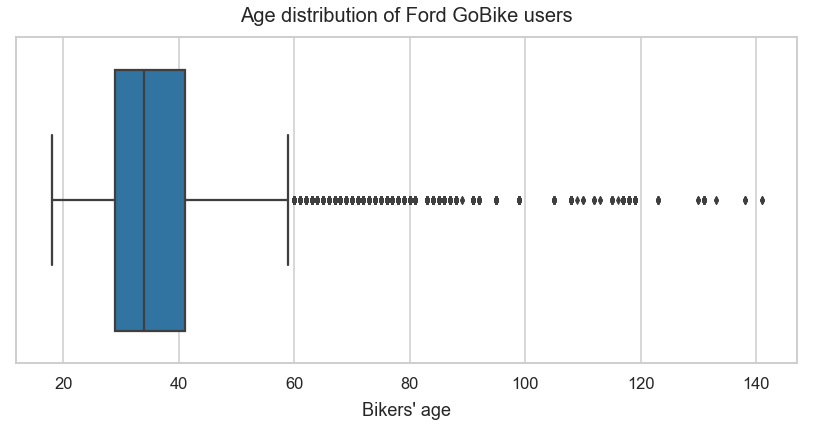

In [29]:
# code for the age boxplot

plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='member_age', color=base_color);
plt.title("Age distribution of Ford GoBike users", fontsize=20, y=1.03)
plt.xlabel("Bikers' age", fontsize=18, labelpad=10)
plt.savefig('image01.png');

Here is the distrubition of users. Ages from 18 to 56 takes 95% of the users. There were users more than 100 years old. So, we can remove users more than 60 years old.

In [30]:
# Checking statistics for age
df_clean.member_age.describe(percentiles = [ .95])

count    2.808247e+06
mean     3.600337e+01
std      1.046344e+01
min      1.800000e+01
50%      3.400000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

The mean age of riders from descriptive statistics is 35 years.

#### Define: ####

Remove age outliers. As mentioned in the Quality issues, there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

#### Code: ####

In [31]:
df_clean = df_clean[df_clean['member_age']<60]

In [32]:
df_clean.drop('member_birth_year', axis=1, inplace=True)

In [33]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)

#### Test: ####

In [34]:
sum(df_clean['member_age']>60)

0

In [35]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2721447 entries, 0 to 3015213
Data columns (total 21 columns):
bike_id                    2721447 non-null object
bike_share_for_all_trip    2287497 non-null category
duration_sec               2721447 non-null int64
end_station_id             2721447 non-null object
end_station_latitude       2721447 non-null float64
end_station_longitude      2721447 non-null float64
end_station_name           2709410 non-null object
end_time                   2721447 non-null datetime64[ns]
member_gender              2721447 non-null category
start_station_id           2721447 non-null object
start_station_latitude     2721447 non-null float64
start_station_longitude    2721447 non-null float64
start_station_name         2709410 non-null object
start_time                 2721447 non-null datetime64[ns]
user_type                  2721447 non-null category
member_age                 2721447 non-null int32
start_time_month_name      2721447 non-null obj

In [36]:
# save cleaned data 
df_clean.to_csv('clean_data.csv', index=False)

#### How is the dataset shaped ? ####

There are 2721447 rides in the dataset with features like bike_id, user_type, member_age, start_station_name etc. Most variables are numeric in the dataset. The dataset contained features about:

* trip duration: start/end time, how long the trip took in seconds
* stations: start/end station, name, geolocation (latitude/longitude)
* anonymized customer data: gender, birth date and user type
* rented bikes: bike id

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

* rental time: month, day, hour of the day, weekday (both for start and end date)
* customer: age


#### List the main feature(s) of interest in your dataset? ####

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.



#### What features in the dataset do you think will help support your investigation into your feature(s) of interest? ####


I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

### Univariate Exploration ###

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips.

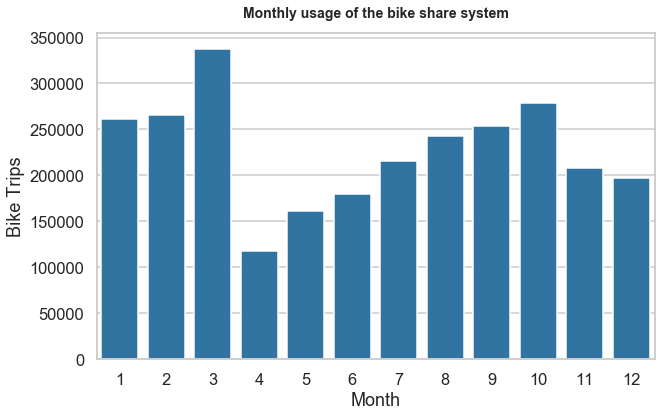

In [37]:
# monthly useage of the bike sharing system
plt.figure(figsize = [10, 6])
g = sns.countplot(data=df_clean, x='start_time_month',color = base_color)
g.set(xlabel='Month', ylabel='Bike Trips')
plt.title('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image02.png');

The above visualization shows us the worst months for the bike sharing system is April followed by the winter months most probably due to the weather conditions. The bike renting is high in demand between May and October, reaching its peak during the springs followed by October.

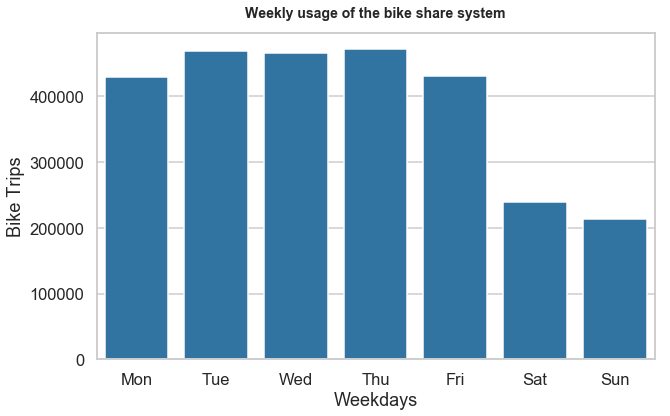

In [38]:
# weekday usege of the bike sharing system
plt.figure(figsize = [10, 6])
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.countplot(data=df_clean, x='start_time_weekday', color = base_color, order = weekday)
g.set(xlabel='Weekdays', ylabel='Bike Trips')
plt.title('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image03.png');

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

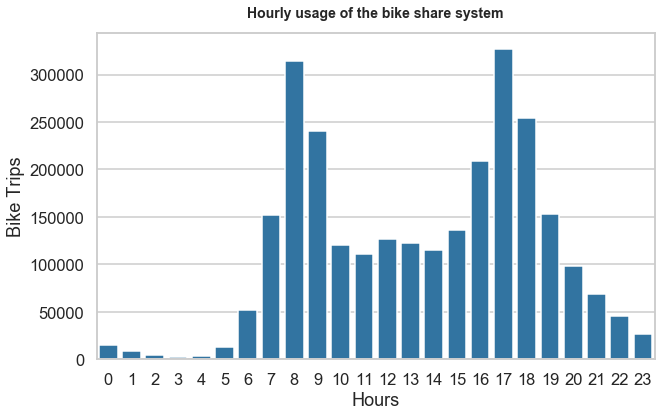

In [39]:
# hourly usege of the bike sharing system
plt.figure(figsize = [10, 6])
g = sns.countplot(data=df_clean, x='start_time_hour', color = base_color)
g.set(xlabel='Hours', ylabel='Bike Trips')
plt.title('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('image04.png');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

In [40]:
# lets now check distribution per user type
df_clean.describe()['duration_sec']

count    2.721447e+06
mean     7.768715e+02
std      2.031094e+03
min      6.100000e+01
25%      3.440000e+02
50%      5.400000e+02
75%      8.330000e+02
max      8.628100e+04
Name: duration_sec, dtype: float64

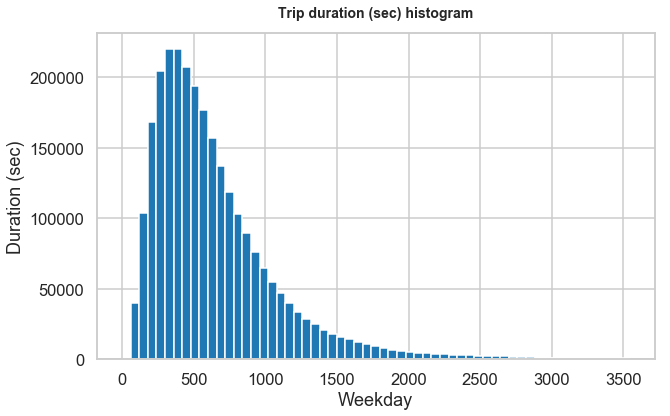

In [41]:
plt.figure(figsize = [10, 6])
bin_edges = np.arange(0, 3600,60)
plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)
plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)')
plt.savefig('image05.png');

Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min. This can be explained by two facts:

* The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
* The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

#### Unusual points to discuss: ####

* Monthly usage of the bike share system plot shows the month of april has the worst usage.
* In the duration plot, duration(sec) in some cases lasted more than 24h. 
* For the member birth year, in some cases birth year was dated before 1900.

### Bivariate Exploration ###

Here I will further explore the dataset by adding the customer type to the analysis.

In [42]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

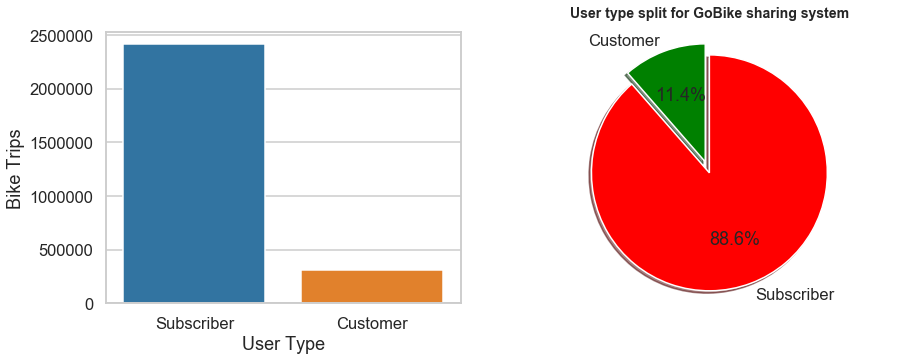

In [43]:
plt.figure(figsize = [14, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['green', 'red']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.title('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image06.png');

The bike sharing system is mainly used by subscribers (88.6%) than ocassional riders (11.4%). 

Next lets check the renting trends per each user type.

In [44]:
df_clean['user_type'].head()

0       Customer
1       Customer
4     Subscriber
6       Customer
12    Subscriber
Name: user_type, dtype: category
Categories (2, object): [Customer, Subscriber]

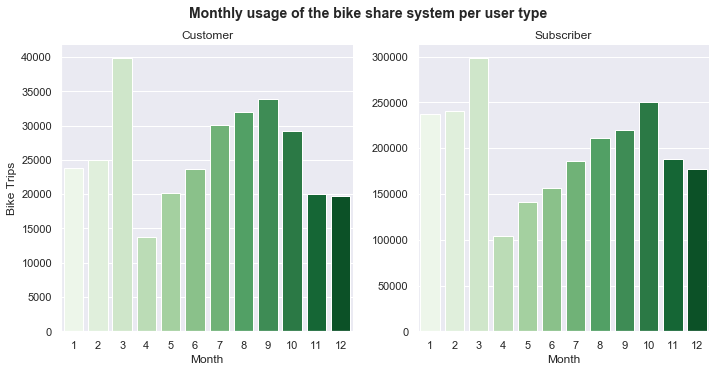

In [45]:
# monthly usege of the bike sharing system per user type
sns.set(rc={'figure.figsize':(15,8)})
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False, palette="Greens")
g.set_axis_labels("Month", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('image07.png');

Winter months and April are the worst for the bike sharing system for both groups what can be determined by the harsher weather.

For Customers, the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For Subscribers, the highest demand is from May till October, reaching it's peak in October. Customers are most probably regular riders using bikes for a daily commute.

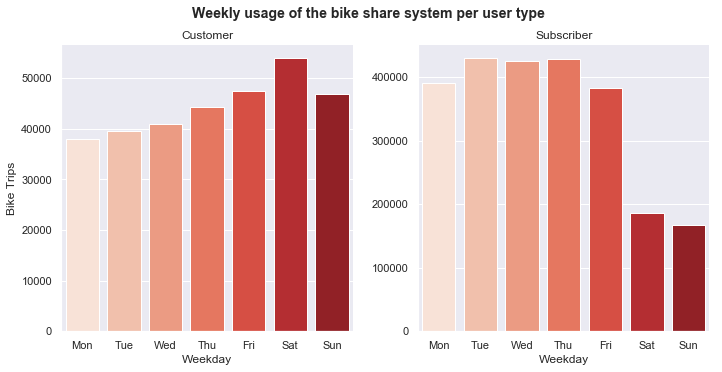

In [46]:
# weekday usege of the bike sharing system per user type

sns.set(rc={'figure.figsize':(15,8)})
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False, palette="Reds",
                order = weekday)
g.set_axis_labels("Weekday", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('image08.png');

There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week. 


Now, lets check when within a day bikes are high in demand.

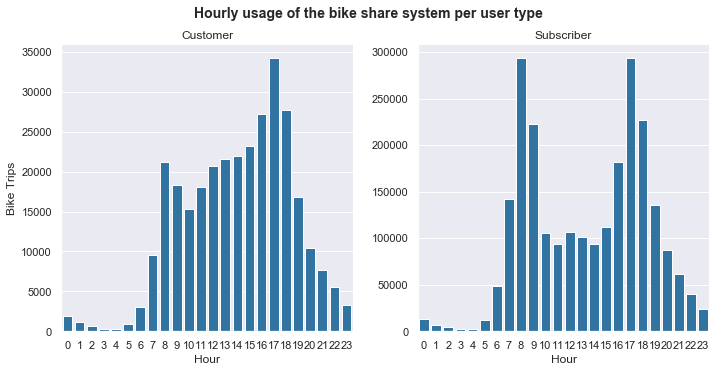

In [47]:
# hourly useage of the bike sharing system per user type
sns.set(rc={'figure.figsize':(15,8)})
g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False, color = base_color)
g.set_axis_labels("Hour", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('image09.png');

There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work. 

Now, lets check how the trip duration varies between customers and subscribers.

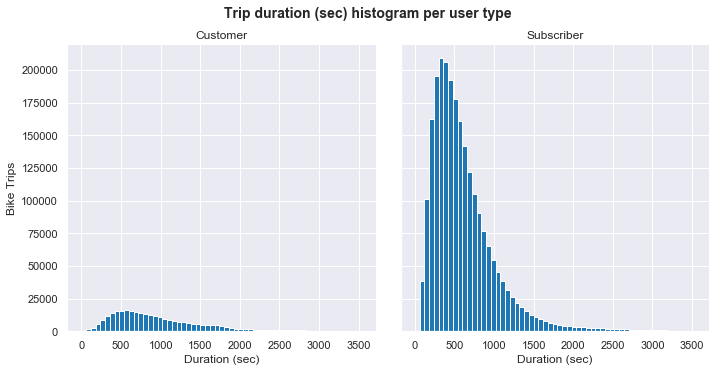

In [48]:
# code for the (histogram) duration (sec) distribution per user type

sns.set(rc={'figure.figsize':(15,8)})
g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image10.png');

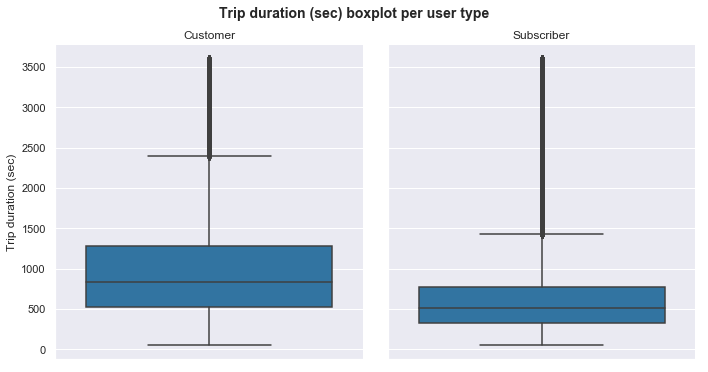

In [49]:
# code for the (boxplot) duration (sec) distribution per user type

sns.set(rc={'figure.figsize':(15,8)})
data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box', color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');
plt.savefig('image11.png');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

#### How did the feature(s) of interest vary with other features in the dataset? ####

Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

#### Did you observe any interesting relationships between the other features? ####

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

### Multivariate Exploration ###

I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

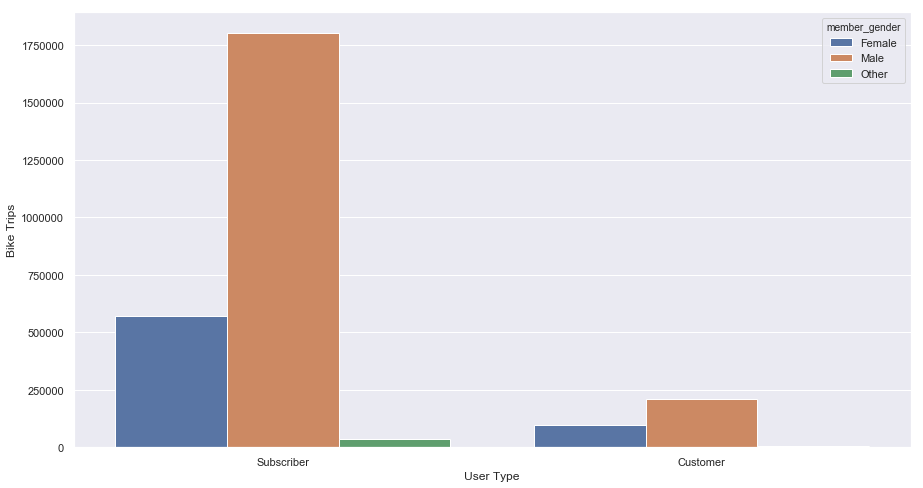

In [50]:
plt.figure(figsize = [15, 8])

# code for the bar chart

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')
plt.savefig('image12.png');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1). 

Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

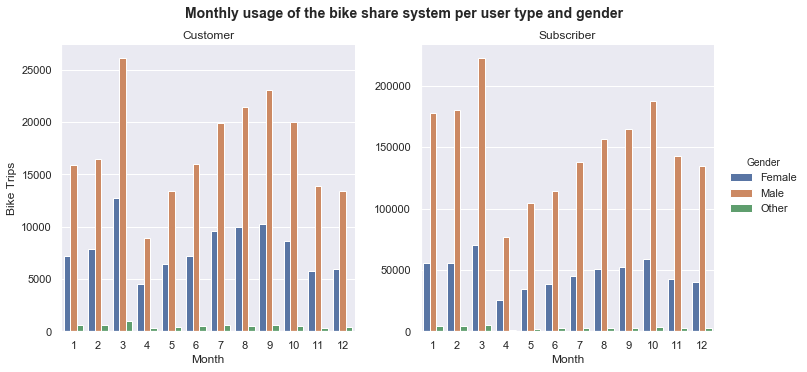

In [51]:
# monthly usege of the bike sharing system per user type and gender
sns.set(rc={'figure.figsize':(20,8)})

g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image13.png');

The trend is very similar for males and females: for customers, the highest demand is around summertime, reaching its peak in July; for subscribers, the highest demand is from May till October, reaching it's peak in October. Suprisingly, for customers there are quite a lot of females using the system between January and March in comparison to males - the ratio is much smaller than for the rest of the year.

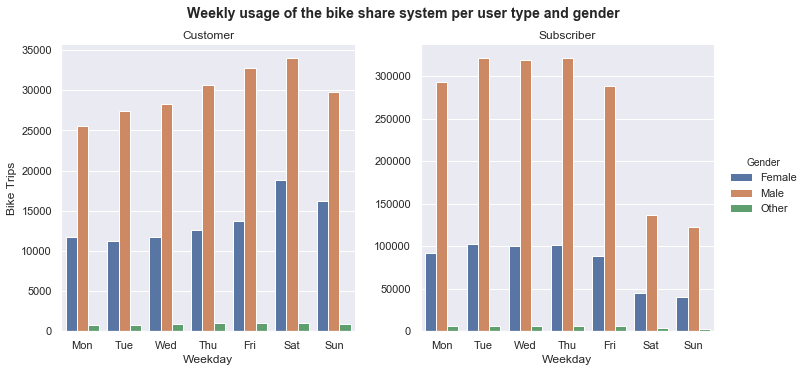

In [52]:
# weekday usege of the bike sharing system per user type and gender
sns.set(rc={'figure.figsize':(15,8)})

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image14.png');

As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week; subscribers use the system mainly within a week.

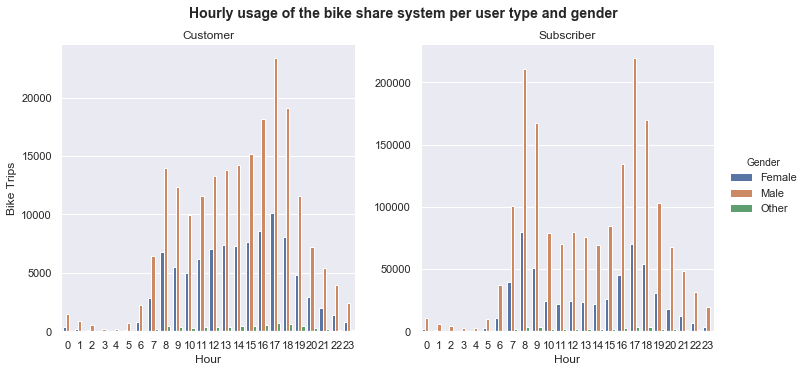

In [57]:
# hourly useage of the bike sharing system per user type and gender
sns.set(rc={'figure.figsize':(15,9)})

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image15.png');

During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

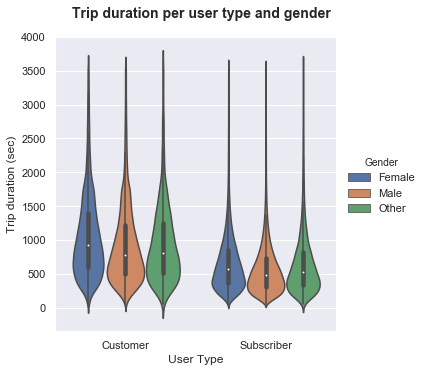

In [54]:
# code for the (violinplot) duration (sec) distribution per user type and gender
sns.set(rc={'figure.figsize':(15,10)})
g = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold')
plt.savefig('image16.png');

we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

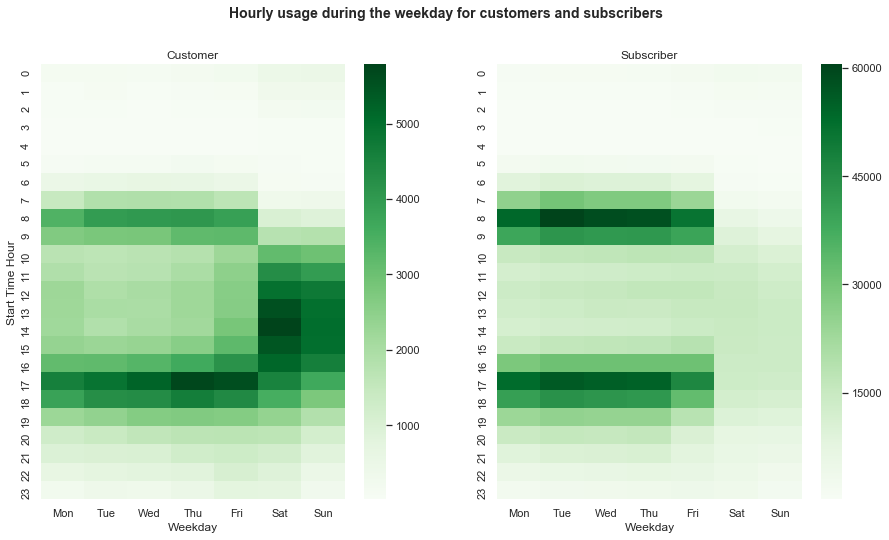

In [55]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(15,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="Greens")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="Greens")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('')
plt.savefig('image17.png');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers

#### Customers use the bike sharing system more often on weekends: ####

* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
* weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

#### Subscribers use the bike sharing system mainly on weekdays: ####

* weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
* weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

#### Interesting or surprising interactions between features: ####

I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends but surprisingly there are quite a lot of females using the system between January and March in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.

# Conclusion #

There were 3.31 billion rides. 20-30 years old users are rapidly growing compared to other user groups. When the service first started 30-40 years old users were dominant, however 20-30 years old users became leader in a year. 20 to 40 years old people took the more than %70 of bike rides. Among those, 30 to 40 years old people's rides account almost %40 of all bike rides. Male took around %76 of all bike rides, and female took around %24 of them. People use this service on weekdays more than weekends. 8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well. Percentage of subscribers is almost %88.15. Percentage of customers is almost %11.85. Customers' rides seems increasing slightly but subscibers' rides reached 6 times more than customers' on October 2018. There is a decrease on November 2018 for subscribers but it seems like it is related with winter season. Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 28 minutes. Subscribers and customers trip distance were about the same, which is slightly more than one mile. 90% of bike rides take place on weekday. The peak bike rides time for all members is around commute time.

Finally, it seems that 40 to 50 years old age group use the service the most. After Ford GoBike did a pilot launch of e-bike on April 24th 2018, there have been quite a lot of electric bike rides as well, which reached to 10% of daily rides at the end of July 2018. However, daily electric bike rides is on downward trend.